In [45]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole 
from IPython.display import display
import os
import pandas as pd 


In [61]:
original_csv = 'data/binders/NVS_NR_bER-ESR1.csv'
original_df = pd.read_csv(original_csv)
original_df = original_df.dropna(axis=1, how='all')
original_df.head(1)
#original_df.dtxsid.unique()

,dtxsid,selected,casrn,compoundId,genericSubstanceId,preferredName,activeAssays,cpdataCount,isotope,molFormula,...,endpointName,ac50,hitc,logAc50,scaledTop,top,bmad,maxMedVal,maxMedConc,_links
0,DTXSID0020365,False,59865-13-3,365.0,20365,Cyclosporin A,166,1.0,0.0,C62H111N11O12,...,NVS_NR_bER,10.0,0,1.0,6.986801e-10,1.688490e-08,4.02781,6.174435,0.845098,{'self': {'href': 'http://ccte-api-ccd.epa.gov...


In [52]:
mol_file_path = 'data/sdf_data/mol_binders_data/NVS_NR_bER-ESR1/2-Hydroxyfluorene.mol'
print(f"Pokušavam da učitam Mol fajl: {os.path.abspath(mol_file_path)}\n")

mol = None
matching_row = None
original_info_row = None
if os.path.exists(mol_file_path):
    try:
        mol = Chem.MolFromMolFile(mol_file_path, sanitize=True, removeHs=False)
    except Exception as e:
        print(f"Greška pri učitavanju Mol fajla: {e}")
else:
    print(f"Fajl nije pronađen: {mol_file_path}")

if mol is not None:
    print("--- Detalji o molekulu iz Mol fajla ---")
    
    # Osnovne hemijske informacije
    print(f"SMILES: {Chem.MolToSmiles(mol)}")
    print(f"InChI: {Chem.MolToInchi(mol)}")
    print(f"InChIKey: {Chem.MolToInchiKey(mol)}")
    #print(f"Molekulska formula: {Chem.rdMolDescriptors.CalcMolFormula(mol)}")
    
    print("\n--- Properties iz CSV fajla ucitani---")
    
    # Izvuci ime Mol fajla bez ekstenzije (npr. 'DTXSID7047144')
    mol_filename_base = os.path.splitext(os.path.basename(mol_file_path))[0]
    assay_name = 'NVS_NR_bER-ESR1'
    
    # Formiraj ime CSV fajla (npr. 'DTXSID7047144.csv')
    csv_filename = assay_name + '.csv'

    source_csv_directory = 'data/sdf_data/binders_csv'
    
    # Formiraj punu putanju do CSV fajla
    csv_file_path = os.path.join(source_csv_directory, csv_filename)

    if os.path.exists(csv_file_path):
        try:
            df_props = pd.read_csv(csv_file_path)
            
            matching_row = df_props[df_props['PREFERRED_NAME'] == mol_filename_base]
            original_info_row = original_df[original_df['preferredName'] == mol_filename_base]
            #print(matching_row.iloc[0])
        except pd.errors.EmptyDataError:
            print(f"Upozorenje: CSV fajl '{csv_filename}' je prazan.")
        except Exception as e:
            print(f"Greška pri čitanju ili obradi CSV fajla '{csv_filename}': {e}")
    else:
        print(f"CSV fajl '{csv_filename}' nije pronađen u direktorijumu '{source_csv_directory}'.")


else:
    print("Nije moguće nastaviti bez učitanog molekula.")

Pokušavam da učitam Mol fajl: /home/ivana-milutinovic/Documents/Doktorske/BIORad/bio-inf-paper/data-processing/data/sdf_data/mol_binders_data/NVS_NR_bER-ESR1/2-Hydroxyfluorene.mol

--- Detalji o molekulu iz Mol fajla ---
SMILES: Oc1ccc2c(c1)Cc1ccccc1-2
InChI: InChI=1S/C13H10O/c14-11-5-6-13-10(8-11)7-9-3-1-2-4-12(9)13/h1-6,8,14H,7H2
InChIKey: ZDOIAPGLORMKTR-UHFFFAOYSA-N

--- Properties iz CSV fajla ucitani---



--- Prikaz molekula sa obojenim vezama (RDKit.Chem.Draw) ---
---Properties molekula iz inicijalnog csv fajla-----
SMILES                                  OC1=CC2=C(C=C1)C1=C(C2)C=CC=C1
InChI                InChI=1S/C13H10O/c14-11-5-6-13-10(8-11)7-9-3-1...
InChIKey                                   ZDOIAPGLORMKTR-UHFFFAOYSA-N
INPUT                                                    DTXSID2047569
FOUND_BY                                           DSSTox_Substance_Id
DTXSID                                                   DTXSID2047569
PREFERRED_NAME                                       2-Hydroxyfluorene
CASRN                                                        2443-58-5
INCHIKEY                                   ZDOIAPGLORMKTR-UHFFFAOYSA-N
IUPAC_NAME                                             9H-Fluoren-2-ol
INCHI_STRING         InChI=1S/C13H10O/c14-11-5-6-13-10(8-11)7-9-3-1...
MOLECULAR_FORMULA                                              C13H10O
AVERAGE_MASS                     

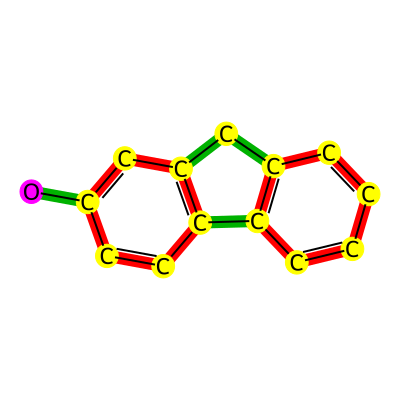

In [55]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG # Za prikaz SVG u Jupyteru
import os
import pandas as pd # Često je korisno za prikaz properties

if mol is not None:
    print("\n--- Prikaz molekula sa obojenim vezama (RDKit.Chem.Draw) ---")
    print('---Properties molekula iz inicijalnog csv fajla-----')
    print(matching_row.iloc[0])
    print('---Properties molekula iz SDF fajla prevedenog u csv-----')
    print(original_info_row.iloc[0])
    
    # Definisanje boja za različite tipove veza
    bond_colors = {
        Chem.BondType.SINGLE: (0.0, 0.7, 0.0),  # Zelena siva za jednostruke
        Chem.BondType.DOUBLE: (1.0, 1.0, 0.0),  # Zuta za dvostruke
        Chem.BondType.TRIPLE: (0.0, 0.0, 1.0),  # Plana za trostruke
        Chem.BondType.AROMATIC: (1.0, 0.0, 0.0) # Crvena za aromatične
    }

    base_atom_colors_palette = {
        6: (1.0, 1.0, 0.0),  # Ugljenik (siva)
        7: (0.0, 0.0, 1.0),  # Azot (plava)
        8: (1.0, 0.0, 1.0),  # Kiseonik (ljubicasta)
        9: (0.0, 1.0, 1.0),  # Fluor (cijan)
        15: (1.0, 0.5, 0.0), # Fosfor (narandžasta)
        16: (1.0, 1.0, 0.0), # Sumpor (žuta)
        17: (0.0, 1.0, 0.0), # Hlor (zelena)
        35: (0.5, 0.0, 0.5), # Brom (ljubičasta)
        53: (0.5, 0.0, 0.0)  # Jod (tamno crvena)
        # Možete dodati još elemenata ovde ako želite
    }
    
    # DINAMIČKO GENERISANJE atom_colors MAPE NA OSNOVU MOLEKULA
    atom_colors = {}
    for atom in mol.GetAtoms():
        atomic_num = atom.GetAtomicNum()
        if atomic_num in base_atom_colors_palette:
            atom_colors[atomic_num] = base_atom_colors_palette[atomic_num]
        else:
            # Ako element nije u predefinisanoj paleti, dodelite mu neku default boju
            # Npr. svetlo siva ili možete generisati random boju za nepoznate elemente
            atom_colors[atomic_num] = (0.9, 0.9, 0.9) # Default svetlo siva
            print(f"  Upozorenje: Atomski broj {atomic_num} ({atom.GetSymbol()}) nije u paleti. Korišćen default boja.")

    # Priprema za crtanje (ostatak koda je isti)
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 400) 
    AllChem.Compute2DCoords(mol) 

    bond_to_color_map = {}
    atom_to_color_map = {}

    for bond in mol.GetBonds():
        idx = bond.GetIdx()
        b_type = bond.GetBondType()
        if b_type in bond_colors:
            bond_to_color_map[idx] = bond_colors[b_type]
        else: 
            bond_to_color_map[idx] = (0.5, 0.5, 0.5) # Default siva za nepoznate tipove veza
    
    for atom in mol.GetAtoms():
        idx = atom.GetIdx()
        atomic_num = atom.GetAtomicNum()
        # Koristimo dinamički generisanu atom_colors mapu
        atom_to_color_map[idx] = atom_colors.get(atomic_num, (0.9, 0.9, 0.9)) # Fallback na svetlo sivu

    drawer.drawOptions().addAtomIndices = False 
    drawer.drawOptions().addBondIndices = False 

    for atom in mol.GetAtoms():
        atom.SetProp("_displayLabel", atom.GetSymbol()) # Postavi simbol elementa kao labelu
        
    drawer.DrawMolecule(mol, 
                        highlightAtoms=list(atom_to_color_map.keys()), 
                        highlightBonds=list(bond_to_color_map.keys()), 
                        highlightAtomColors=atom_to_color_map, 
                        highlightBondColors=bond_to_color_map) # <-- UKLONJEN atomLabels
    

    
    drawer.FinishDrawing()
    
    svg_output = drawer.GetDrawingText()
    display(SVG(svg_output))
else:
    print("Nije moguće nastaviti bez učitanog molekula.")


--- Konvertovanje u NetworkX graf i prikaz ---
NetworkX graf kreiran: 14 čvorova, 16 ivica.
NetworkX - Broj komponenti povezanosti: 1


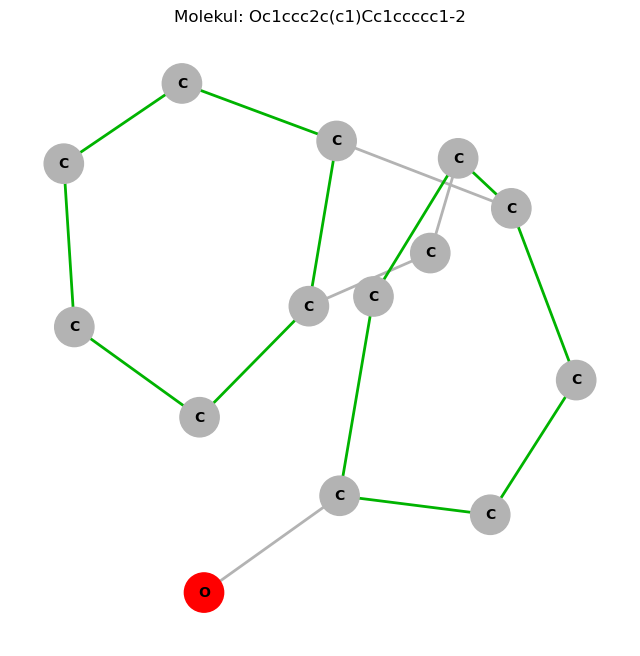

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

if mol is not None:# --- Konvertovanje u NetworkX Graf i Prikaz (opciono, ostaje isto) ---

    print("\n--- Konvertovanje u NetworkX graf i prikaz ---")
    
    G = nx.Graph()

    for i, atom in enumerate(mol.GetAtoms()):
        atomic_num = atom.GetAtomicNum()
        atom_symbol = atom.GetSymbol()
        G.add_node(i, atomic_num=atomic_num, symbol=atom_symbol,
                   is_aromatic=atom.GetIsAromatic(),
                   degree=atom.GetDegree(),
                   # Koristimo dinamički generisanu atom_colors mapu za NetworkX
                   color=atom_colors.get(atomic_num, (0.9,0.9,0.9))) 

    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        bond_type = bond.GetBondType()
        bond_color = bond_colors.get(bond_type, (0.5,0.5,0.5)) 
        G.add_edge(u, v, bond_type=bond_type.name, color=bond_color)

    print(f"NetworkX graf kreiran: {G.number_of_nodes()} čvorova, {G.number_of_edges()} ivica.")
    print(f"NetworkX - Broj komponenti povezanosti: {nx.number_connected_components(G)}")
    
    plt.figure(figsize=(8, 8))
    
    pos = nx.spring_layout(G, seed=42) 

    node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    edge_colors = [G.edges[edge]['color'] for edge in G.edges()]
    
    node_labels = {node: G.nodes[node]['symbol'] for node in G.nodes()}

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')
    
    plt.title(f"Molekul: {Chem.MolToSmiles(mol)}")
    plt.axis('off') 
    plt.show()